# Ejercicio: Detector de Sarcasmo con modelos lienales

En este notebook, te propongo que utilices todo lo que hemos visto en el notebook anterior (ayudándote del resto también, claro) para realizar tu propio detector de sarcasmo. 


Para ello, utilizarás el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos.



![Detector de Sarcasmo](sarcasmo.jpg)

Puedes descargar los datos desde [aquí](https://nlp.cs.princeton.edu/SARC/0.0/main/train-balanced.csv.bz2).

In [1]:
# Librerías principales:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Si entras en el enlace que hay más atrás, verás que se crea una funciónpara representar una nube de palabras. A continuación, se recoge esa misma función para que la utilices en el análisis si lo crees conveniente:

In [10]:
# Esta función te servirá de ayuda pero no es obligatorio usarla:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(20.0,12.0), 
                   title = None, title_size=40, image_color=False, stop_words=STOPWORDS):
    stopwords = set(stop_words)
    more_stopwords = {'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [11]:
train_df = pd.read_csv('train-balanced-sarcasm.csv')

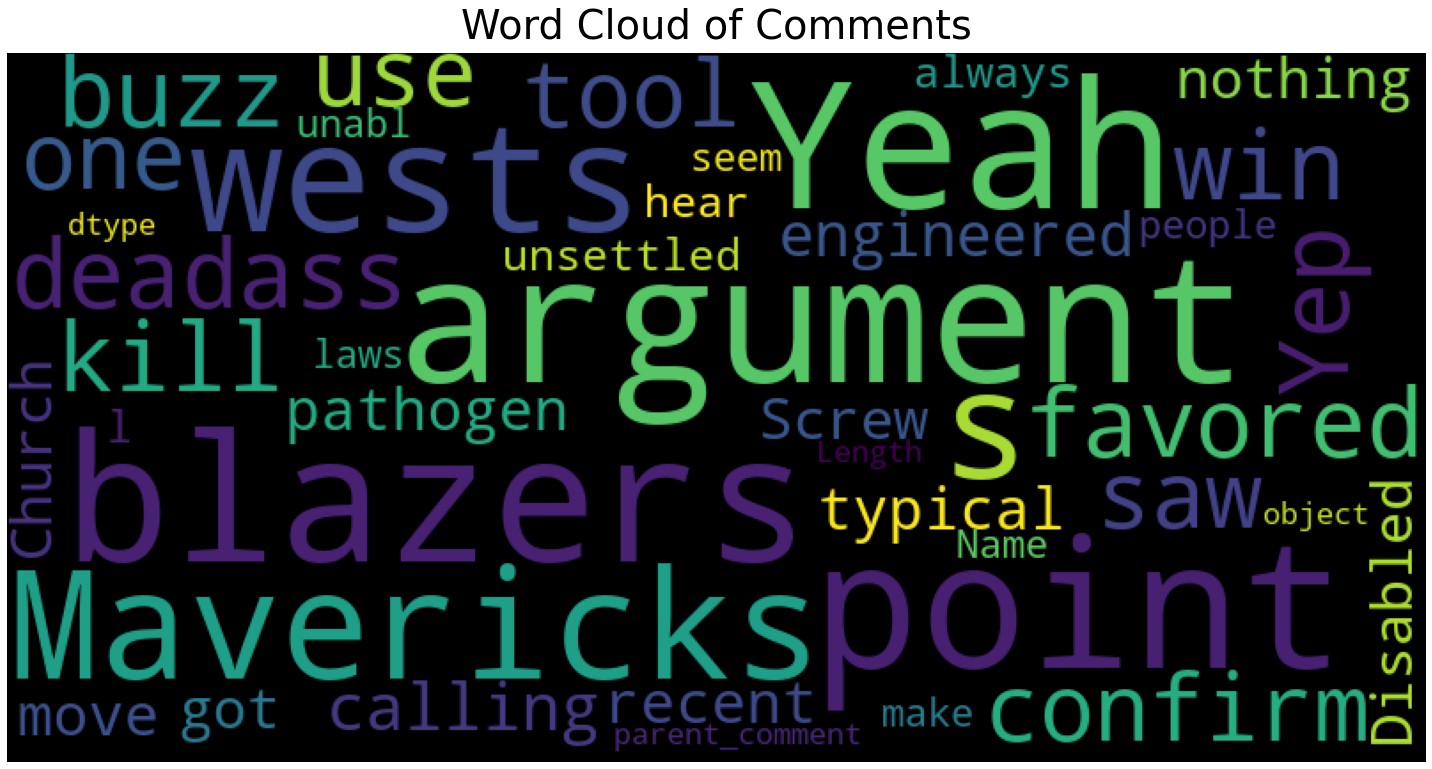

In [21]:
# Ejemplo de uso con la nube de palabras:
plot_wordcloud(train_df["parent_comment"], title="Word Cloud of Comments")

In [22]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


El datast está formado por:
  * ``label``: indicador de sarcasmo/no sarcasmo
  * ``comment``: comentario (respuesta a un tópico)
  * ``author``: usuario que ha escrito el comentario
  * ``subreddit``: temática
  * ``score``: puntuación
  * ``ups``: likes
  * ``downs``: dislikes
  * ``date``: mes de creación
  * ``created_utc``: hora de creación
  * ``parent_comment``: tópico original al que se responde

Para realizar este problema deberás:

1. Eliminar los nulos/missings (en el caso de que los haya)

2. Comprobar el balanceo de los datos

3. Analiza el dataset y haz algún que otro gráfico que te ayude a comprender los datos. Puede que el siguiente enlace te sirva de referencia: [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc)

4. Construye un pipeline con un TF-IDF + LogisticRegressor para predecir si un comentario es sarcástico o no, basándose únicamente en el texto del comentario de Reddit

5. ¿Cuáles son palabras/bigramas del modelo que más aportan a la predicción?

6. Construye otros pipelines probando diferentes combinaciones a ver si consigues mejorar este modelo (puedes cambiar incluso el propio modelo)
